Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.84221561 0.06638329]
 [0.82983881 0.40984822]
 [0.43577323 0.86314176]]
[ 1.02116767 -2.20283317  0.2968072   1.07195861  0.81100455]
[18 71 95 89 50 20 67  1 32 16]
[5 5 6]
[ 0.11650241  2.16099646 -1.6194617  -0.36259976  1.84096407 -0.9746185
  0.85783041 -1.56635261  0.00747758  1.05009906]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
# Write your code for AIM #1 here
import random
import time
import pandas as pd
import numpy as np

start = time.time()
data = [random.randint(1, 100) for _ in range(1000000)]
print(f"Time taken: {time.time() - start} seconds")

start = time.time()
data_np = np.random.randint(1, 100, size=1000000)
print(f"Time taken: {time.time() - start} seconds")


Time taken: 0.32243800163269043 seconds
Time taken: 0.0 seconds


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [3]:
# Write your code for AIM #2 here
import itertools

# Loading the CSV file
start = time.time()
data_np = np.genfromtxt(
    'sleep_health.csv',
    delimiter=',',
    skip_header=0,
    encoding='utf-8',
    names=True,
)
print('Numpy:', time.time() - start, 'seconds')
print()
start = time.time()
data_df = pd.read_csv('sleep_health.csv')
print('Pandas:', time.time() - start, 'seconds')
print('-' * 30)

# Mean
columns = ['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']
columns_ = [column.replace(' ', '_') for column in columns]
start = time.time()
for column in columns_:
    print(column, np.mean(data_np[column], axis=0))
print('Numpy:', time.time() - start, 'seconds')
print()
start = time.time()
print(data_df.loc[:, columns].mean())
print('Pandas:', time.time() - start, 'seconds')
print('-' * 30)

# Correlation
columns = ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']
columns_ = [column.replace(' ', '_') for column in columns]
start = time.time()
for x, y in itertools.product(columns_, columns_):
    print(f"{x} and {y}", np.corrcoef(data_np[x], data_np[y])[0, 1])
print('Numpy:', time.time() - start, 'seconds')
print()
start = time.time()
print(data_df.loc[:, columns].corr().to_string())
print('Pandas:', time.time() - start, 'seconds')
print('-' * 30)

# Standard Deviation
start = time.time()
print('Standard Deviation of Sleep Duration:', np.std(data_np['Sleep_Duration'], axis=0, ddof=1))
print('Numpy:', time.time() - start, 'seconds')
print()
start = time.time()
print('Standard Deviation of Sleep Duration:', data_df.loc[:, 'Sleep Duration'].std())
print('Pandas:', time.time() - start, 'seconds')
print('-' * 30)


Numpy: 0.0 seconds

Pandas: 0.00952911376953125 seconds
------------------------------
Sleep_Duration 7.132085561497325
Systolic_blood_pressure 128.55347593582889
Diastolic_blood_pressure 84.64973262032086
Heart_Rate 70.16577540106952
Daily_Steps 6816.844919786096
Numpy: 0.0 seconds

Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
Pandas: 0.0010120868682861328 seconds
------------------------------
Person_ID and Person_ID 1.0
Person_ID and Age 0.9905164030218654
Person_ID and Sleep_Duration 0.2963049949839032
Person_ID and Quality_of_Sleep 0.43161207855278005
Person_ID and Physical_Activity_Level 0.14988220060792073
Person_ID and Stress_Level -0.3942870766190165
Person_ID and Systolic_blood_pressure 0.6115505214632945
Person_ID and Diastolic_blood_pressure 0.5906704307920324
Person_ID and Heart_Rate -0.22546715903704703
P

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

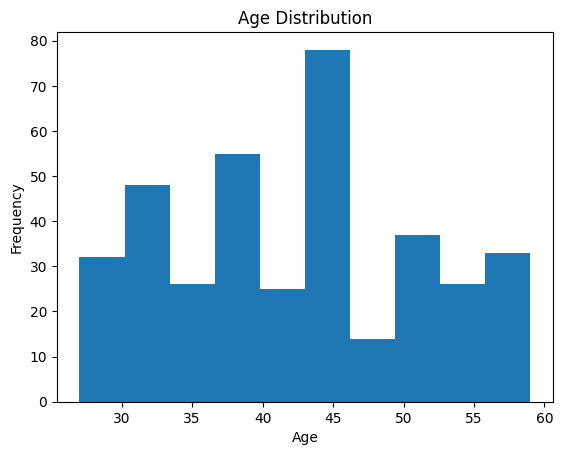

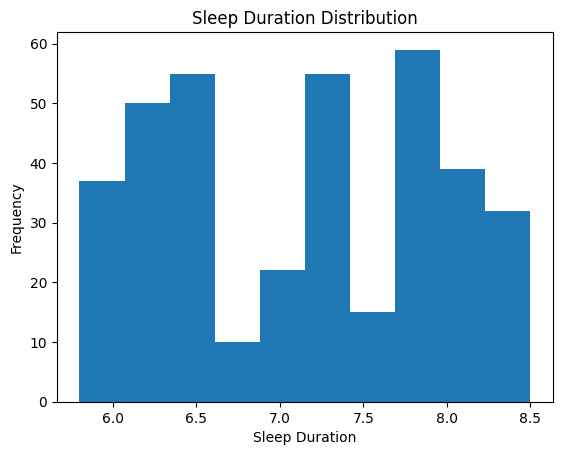

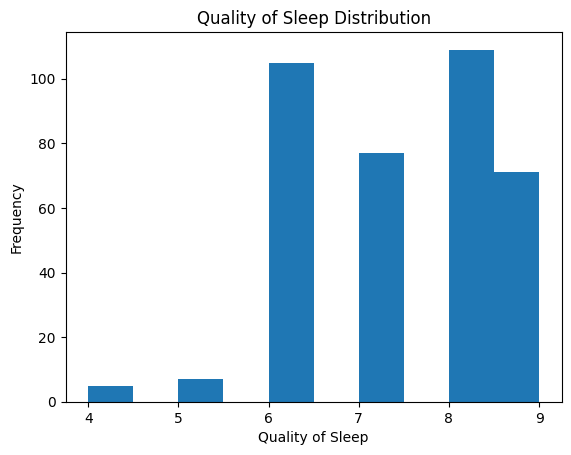

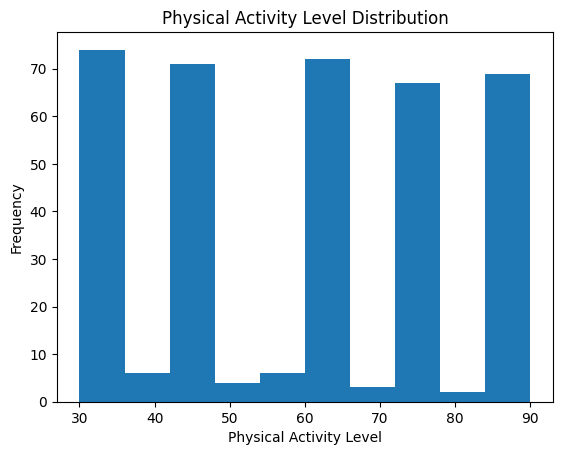

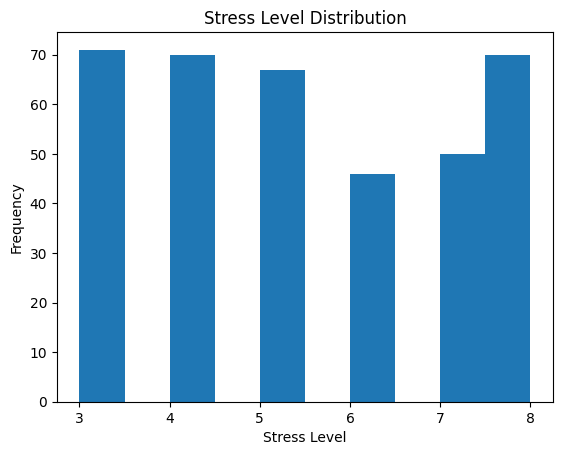

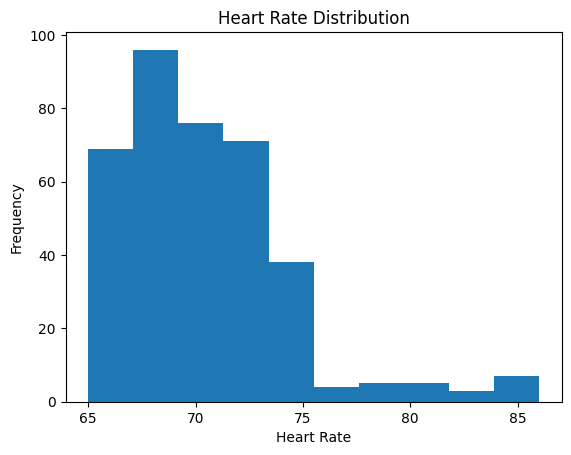

In [4]:
# Write your code for AIM #3 here
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('sleep_health.csv')

plt.figure()
plt.hist(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.figure()
plt.hist(df['Sleep Duration'])
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')

plt.figure()
plt.hist(df['Quality of Sleep'])
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')

plt.figure()
plt.hist(df['Physical Activity Level'])
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')

plt.figure()
plt.hist(df['Stress Level'])
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')

plt.figure()
plt.hist(df['Heart Rate'])
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

plt.show()

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

